In [2]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt

In [3]:
gauss = lambda x: np.exp(4-(4/(4*x*(1-x))))

K = np.zeros(200)
for i in range(100):
    if i == 0:
        continue
    val = gauss(i/100)
    K[i] = val
    K[i+100] = val

growth = lambda x: 2 * np.exp(((x - 0.33)**2)/-0.01) - 1

def step(A):
    conv = np.convolve(A, K, mode="same")
    g = np.array([growth(c) for c in conv])
    return np.clip(A + (0.1*g), 0, 1)


In [15]:
samples = (np.sin(0.01 * np.arange(1024))).astype(np.float32)
samples = np.fft.fft(samples)
norm = np.linalg.norm(samples)
samples = samples / norm
# samples = np.random.rand(1024)

def callback(in_data, frame_count, time_info, status):
    global samples
    
    data = step(samples)
    samples = data
    norm = np.linalg.norm(samples)
    data = (2 * data / norm) - 1
    
    t = np.fft.ifft(data)
    return (t, pyaudio.paContinue)
    # return (samples, pyaudio.paContinue)

p = pyaudio.PyAudio()

# Open stream using callback (3)
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=44100,
                output=True,
                stream_callback=callback)

/var/folders/np/tqrpvjw547x9313tqpr0sfd00000gn/T/ipykernel_18662/3099166984.py:13: RuntimeWarning: invalid value encountered in divide
  data = (2 * data / norm) - 1


/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


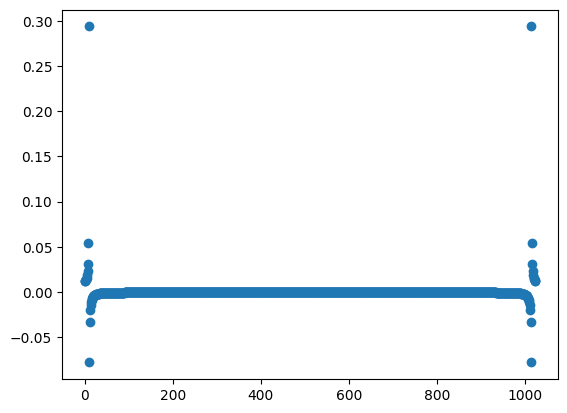

In [10]:

samples = (np.sin(2 * np.pi * np.arange(1024) * 440 / 44100)).astype(np.float32)
t = np.fft.ifft(samples)
plt.scatter(range(1024), t)

In [ ]:
# TODO do the thing in the frequency domain and then convert back!!!!
# maybe will get smoother notes this way and the things that will be doin shit are the
# frequencies!!!!!

# ok this seems like its the same if we do the stuff in the freq domain or the time domain, should think about why that is